In [119]:
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [120]:
heart_dataset = pd.read_csv('/content/heart (2).csv') 

In [121]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [122]:
heart_dataset.shape

(1029, 14)

In [123]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,54.395530,0.694849,0.972789,131.198251,245.163265,0.193392,0.529640,148.600583,0.337221,1.072206,1.381924,0.753158,2.316812,0.511176
std,9.110008,0.460695,1.478523,18.762429,53.242366,1.442988,0.527775,24.412690,0.472991,1.177796,0.619796,1.030329,0.632086,0.500118
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,35.000000,200.000000,564.000000,45.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [124]:
heart_dataset['target'].value_counts()

1    526
0    503
Name: target, dtype: int64

In [125]:
X = heart_dataset.drop(columns = 'target', axis=1)
Y = heart_dataset['target']

In [126]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1024   54    1   0       120   188    0        1      113      0      1.4   
1025   34    0   0         0     0    0        0        0      0      0.0   
1026   65    0   0        45    56    1        1       34      1      0.8   
1027   45    1   0         0     0    0        0        0      0      0.0   
1028   34    1  35        56    67   45        1       34      1      4.2   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [127]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1024    0
1025    0
1026    0
1027    0
1028    0
Name: target, Length: 1029, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

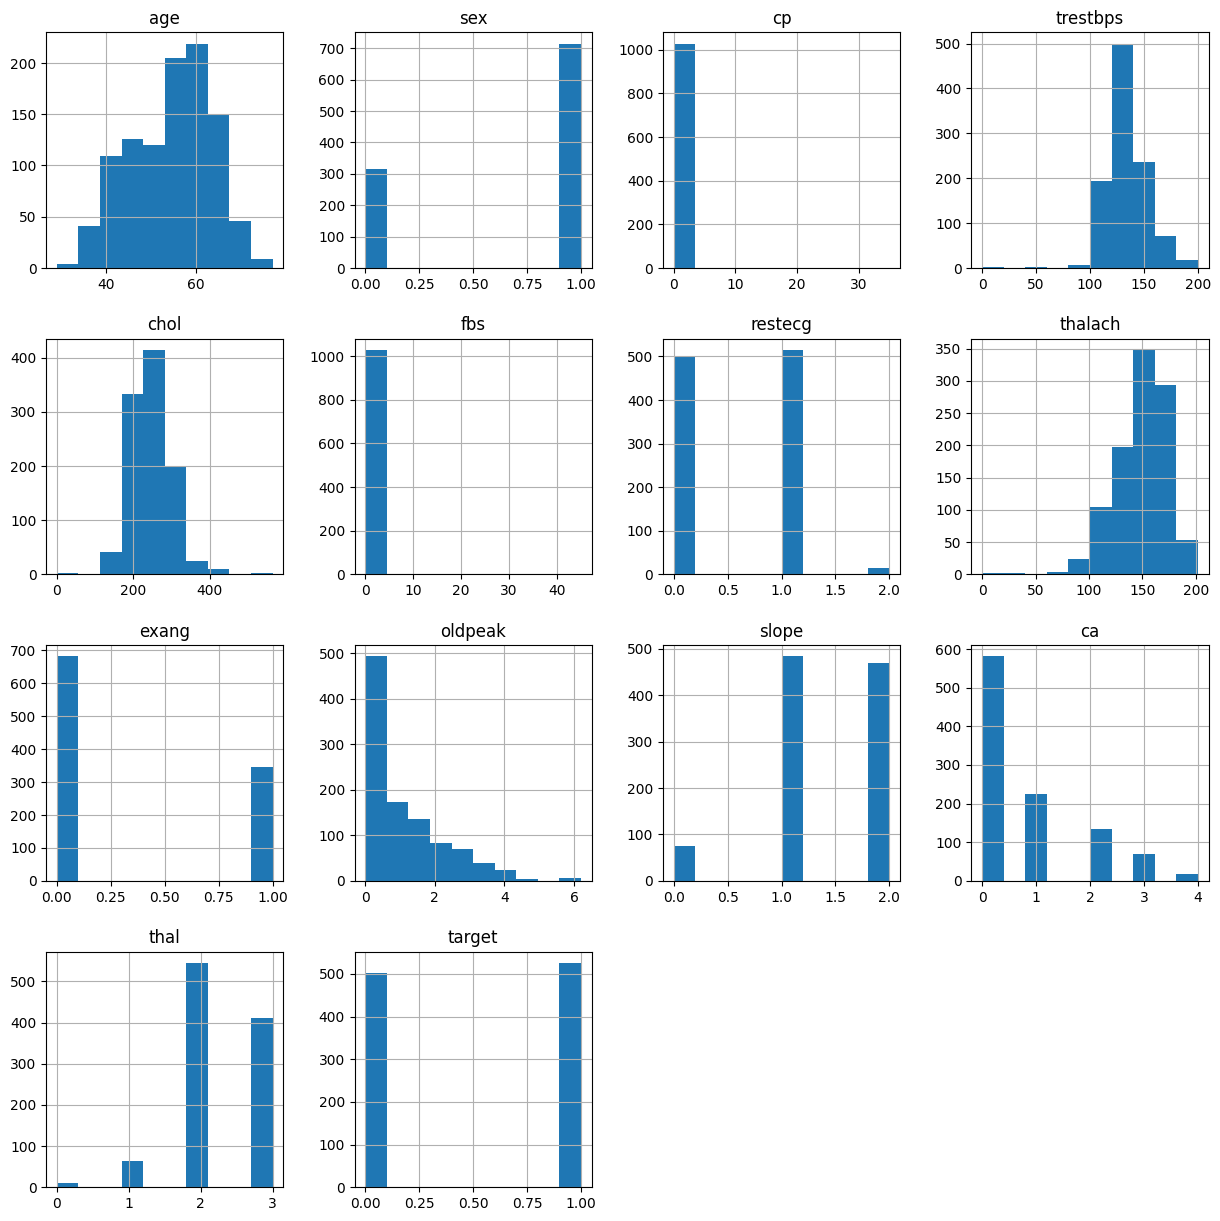

In [128]:
heart_dataset.hist(figsize=(15,15))
plt.show

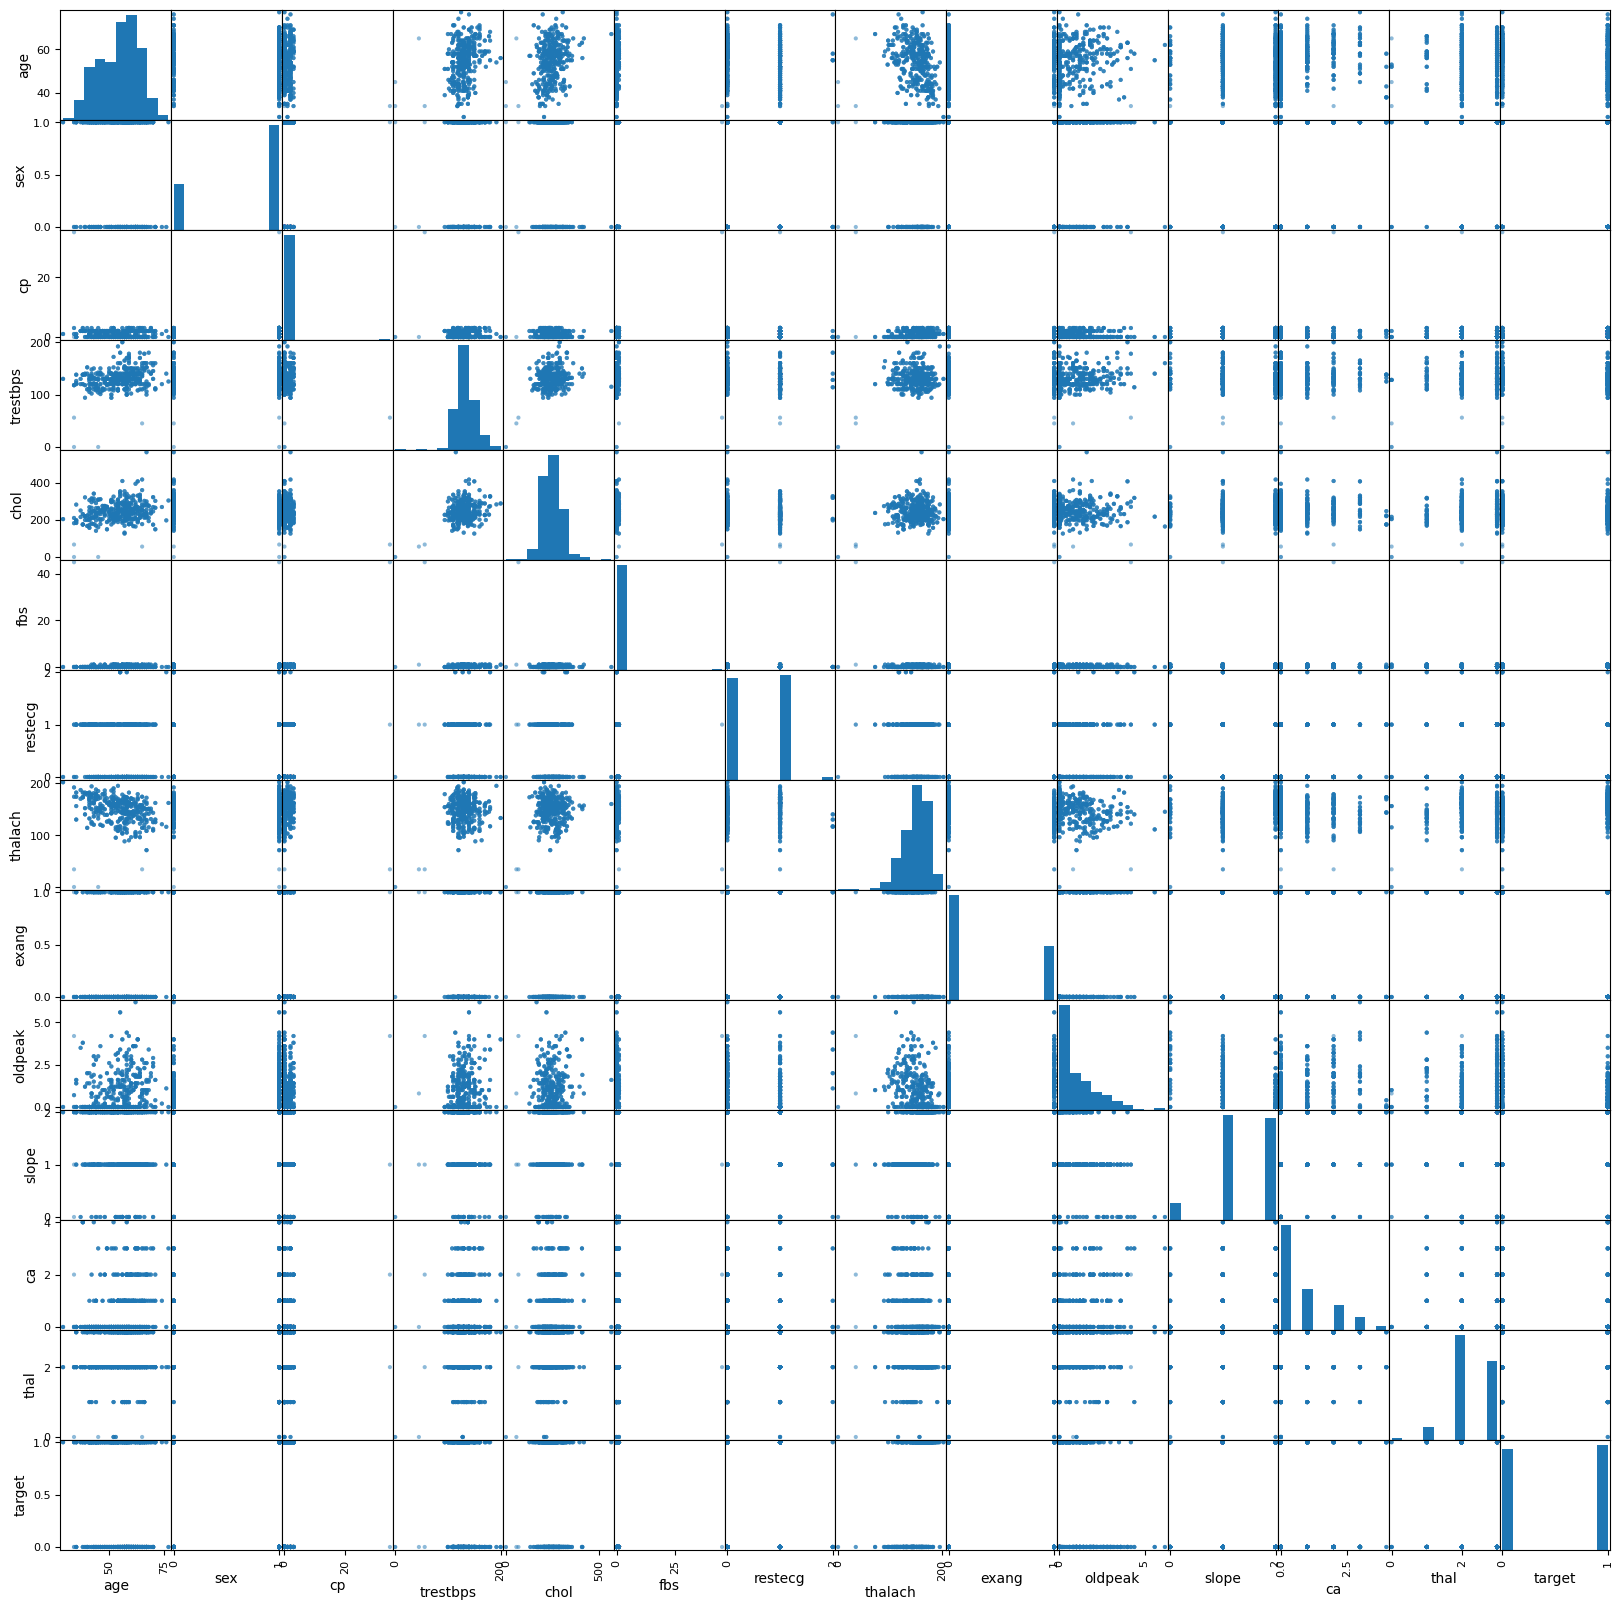

In [129]:
scatter_matrix(heart_dataset,figsize=(20,20))
plt.show()

<Axes: >

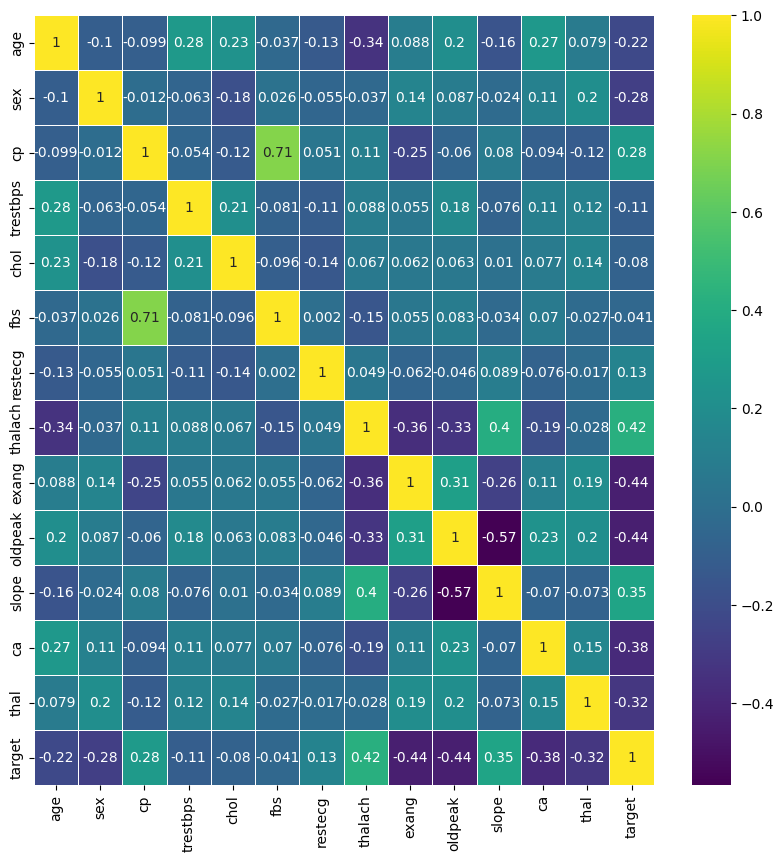

In [130]:
corrmat=heart_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,cmap='viridis',annot=True,linewidth=0.5,)

In [131]:
from sklearn.feature_selection import mutual_info_classif
#mutual_info = mutual_info_classif(X_train,Y_train)
#mutual_info
#mutual_info = pd.Series(mutual_info)
#mutual_info.index = X_train.columns
#mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

mutual_info = mutual_info_classif(X, Y)

# Step 3: Rank the features
feature_scores = pd.Series(mutual_info, index=X.columns)
feature_scores = feature_scores.sort_values(ascending=False)

# Step 4: Select the top-k features
k = 9  # Number of features to select
top_k_features = feature_scores[:k].index.tolist()

# Step 5: Subset the dataset with selected features
X_subset = X[top_k_features]
print(X_subset)

      chol  thalach  thal  cp  oldpeak  ca  exang  age  slope
0      212      168     3   0      1.0   2      0   52      2
1      203      155     3   0      3.1   0      1   53      0
2      174      125     3   0      2.6   0      1   70      0
3      203      161     3   0      0.0   1      0   61      2
4      294      106     2   0      1.9   3      0   62      1
...    ...      ...   ...  ..      ...  ..    ...  ...    ...
1024   188      113     3   0      1.4   1      0   54      1
1025     0        0     0   0      0.0   0      0   34      0
1026    56       34     0   0      0.8   0      1   65      1
1027     0        0     0   0      0.0   0      0   45      0
1028    67       34     2  35      4.2   2      1   34      1

[1029 rows x 9 columns]


In [132]:
#from sklearn.feature_selection import SelectKBest
#sel_seven_cols=SelectKBest(mutual_info_classif,k=7)
#sel_seven_cols.fit(X_train.fillna(0),Y_train)
#X_train.columns[sel_seven_cols.get_support()]


In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(X_subset,Y, test_size = 0.2, stratify=Y, random_state=2)

In [134]:
print(X.shape, X_train.shape, X_test.shape)

(1029, 13) (823, 9) (206, 9)


In [135]:
SvmModel = svm.SVC(kernel='linear')

In [136]:
SvmModel.fit(X_train, Y_train)

SVC(kernel='linear')

In [137]:
X_train_predictionSvm = SvmModel.predict(X_train)
training_data_accuracySvm = accuracy_score(X_train_predictionSvm, Y_train)

In [138]:
print('Accuracy score of the training data : ', training_data_accuracySvm)

Accuracy score of the training data :  0.8444714459295262


In [139]:
X_test_predictionSvm = SvmModel.predict(X_test)
test_data_accuracySvm = accuracy_score(X_test_predictionSvm, Y_test)

In [140]:
print('Accuracy score of the test data : ', test_data_accuracySvm)

Accuracy score of the test data :  0.7669902912621359


In [141]:
DTmodel= DecisionTreeClassifier(criterion='entropy', random_state=0)  
DTmodel.fit(X_train, Y_train) 

X_train_predictionDT = DTmodel.predict(X_train)
training_data_accuracyDT = accuracy_score(X_train_predictionDT, Y_train)

print('Accuracy on Training data : ', training_data_accuracyDT)

X_test_predictionDT = DTmodel.predict(X_test)
test_data_accuracyDT = accuracy_score(X_test_predictionDT, Y_test)
     
print('Accuracy on Test data : ', test_data_accuracyDT)

Accuracy on Training data :  1.0
Accuracy on Test data :  1.0


In [142]:
RFmodel= RandomForestClassifier(n_estimators=10,criterion="entropy")
RFmodel.fit(X_train, Y_train) 

X_train_predictionRF = RFmodel.predict(X_train)
training_data_accuracyRF = accuracy_score(X_train_predictionRF, Y_train)

print('Accuracy on Training data : ', training_data_accuracyRF)

X_test_predictionRF = RFmodel.predict(X_test)
test_data_accuracyRF = accuracy_score(X_test_predictionRF, Y_test)
     
print('Accuracy on Test data : ', test_data_accuracyRF)

Accuracy on Training data :  1.0
Accuracy on Test data :  0.9854368932038835


In [143]:
KnnModel=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
KnnModel.fit(X_train,Y_train)

X_train_predictionKnn = KnnModel.predict(X_train)
training_data_accuracyKnn = accuracy_score(X_train_predictionKnn, Y_train)

print('Accuracy on Training data : ', training_data_accuracyKnn)

X_test_predictionKnn = KnnModel.predict(X_test)
test_data_accuracyKnn = accuracy_score(X_test_predictionKnn, Y_test)
     
print('Accuracy on Test data : ', test_data_accuracyKnn)

Accuracy on Training data :  0.8967193195625759
Accuracy on Test data :  0.7378640776699029


In [144]:
LrModel=LogisticRegression(random_state=0)
LrModel.fit(X_train,Y_train)

X_train_predictionLr = LrModel.predict(X_train)
training_data_accuracyLr = accuracy_score(X_train_predictionLr, Y_train)

print('Accuracy on Training data : ', training_data_accuracyLr)

X_test_predictionLr = LrModel.predict(X_test)
test_data_accuracyLr = accuracy_score(X_test_predictionLr, Y_test)
     
print('Accuracy on Test data : ', test_data_accuracyLr)

Accuracy on Training data :  0.8517618469015796
Accuracy on Test data :  0.7766990291262136


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [145]:
train=[]
test=[]

train.append(training_data_accuracySvm)
test.append(test_data_accuracySvm)
train.append(training_data_accuracyDT)
test.append(test_data_accuracyDT)
train.append(training_data_accuracyRF)
test.append(test_data_accuracyRF)
train.append(training_data_accuracyKnn)
test.append(test_data_accuracyKnn)
train.append(training_data_accuracyLr)
test.append(test_data_accuracyLr)

print(train)
print(test)

[0.8444714459295262, 1.0, 1.0, 0.8967193195625759, 0.8517618469015796]
[0.7669902912621359, 1.0, 0.9854368932038835, 0.7378640776699029, 0.7766990291262136]


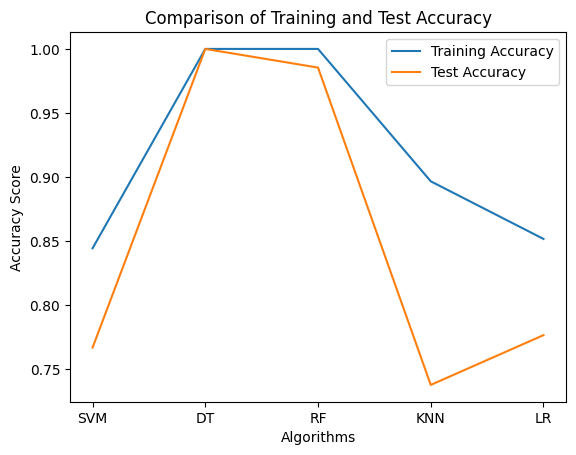

In [146]:
from matplotlib import pyplot as plt  
import numpy as np  
  
algorithms = ["SVM", "DT", "RF","KNN","LR"]

training_scores = train
test_scores =test

# Plotting
plt.plot(algorithms, training_scores, label='Training Accuracy')
plt.plot(algorithms, test_scores, label='Test Accuracy')

# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Training and Test Accuracy')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [151]:
input_data = (248,122,2,0,1,0,0,58,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = DTmodel.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [153]:
import pickle
     

filename = 'heart_disease_model.sav'
pickle.dump(DTmodel, open(filename, 'wb'))
     

# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))
     



age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


In [154]:
for column in X_train.columns:
  print(column)

chol
thalach
thal
cp
oldpeak
ca
exang
age
slope
